In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_import_2018 = pd.read_excel('DATA/Import/Import-2018.xlsx')

In [4]:
df_import_2019 = pd.read_excel('DATA/Import/Import-2019.xlsx')

In [5]:
df_import_2020 = pd.read_excel('DATA/Import/Import-Janar-Dhjetor-2020.xlsx')

In [6]:
df_import_2021 = pd.read_excel('DATA/Import/Import-Janar-Shkurt-2021.xlsx')

In [7]:
import_df = pd.concat([df_import_2018,df_import_2019,df_import_2020,df_import_2021],
                      axis=0).reset_index(drop=True)

In [9]:
import_df.drop(['Regjimi','Origjina','Kodi Tarifor','Sasia','Vlera Mallrave','Netweight'],axis=1,inplace=True)

In [11]:
import_df['Income'] = import_df['Taksa Doganës'] + import_df['Taksa Akcizës'] + import_df['Taksa TVSH-së']

In [13]:
import_df.drop(['Taksa Doganës','Taksa Akcizës','Taksa TVSH-së'],axis=1,inplace=True)

In [17]:
import_df

,VITI,MUAJI,Income
0,2018,1,55504.44
1,2018,1,202268.57
2,2018,1,2541676.99
3,2018,1,173818.43
4,2018,1,8697.30
...,...,...,...
637739,2021,2,48.33
637740,2021,2,399.23
637741,2021,2,0.00
637742,2021,2,1113.93


In [30]:
import_df[(import_df['MUAJI'] == 1)][import_df['VITI'] == 2018].sum()

<ipython-input-30-e877f897a33f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import_df[(import_df['MUAJI'] == 1)][import_df['VITI'] == 2018].sum()


VITI      25681068.00
MUAJI        12726.00
Income    62953745.31
dtype: float64

In [39]:
mi_df = import_df.groupby([(import_df['VITI']),(import_df.MUAJI)]).sum()

In [41]:
mi_df.head()

Income
VITI MUAJI             
2018 1      62953745.31
     2      66958785.41
     3      80449479.50
     4      88911890.04
     5      98208820.93

In [119]:
df = mi_df.reset_index(level=[0,1])

In [120]:
df.head()

,VITI,MUAJI,Income
0,2018,1,62953745.31
1,2018,2,66958785.41
2,2018,3,80449479.50
3,2018,4,88911890.04
4,2018,5,98208820.93


In [121]:
new_col = df[['VITI','MUAJI']].apply(lambda x : '{}-{}'.format(x[0],x[1]), axis=1)
df.insert(loc=0, column='Date', value=new_col)
df.drop(['VITI','MUAJI'],axis=1,inplace=True)

In [122]:
df.head()

,Date,Income
0,2018-1,62953745.31
1,2018-2,66958785.41
2,2018-3,80449479.50
3,2018-4,88911890.04
4,2018-5,98208820.93


---

In [142]:
df_income = df.copy()

In [143]:
df_income['Date'] = pd.to_datetime(df_income.Date)

In [100]:
df_income.head()

,Date,Income
0,2018-01-01,62953745.31
1,2018-02-01,66958785.41
2,2018-03-01,80449479.50
3,2018-04-01,88911890.04
4,2018-05-01,98208820.93


In [156]:
df_income.Date[1]

Timestamp('2018-02-01 00:00:00')

In [158]:
df_income.set_index("Date",inplace=True)

In [159]:
df_income.head()

,Income
Date,
2018-01-01,62953745.31
2018-02-01,66958785.41
2018-03-01,80449479.50
2018-04-01,88911890.04
2018-05-01,98208820.93


<AxesSubplot:xlabel='Date'>

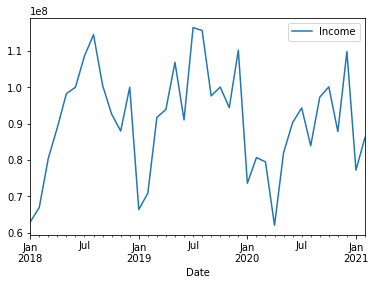

In [160]:
df_income.plot()